# 🔹Step 1: Understand and Clean the Data

## 📌 Cell 0 – Upload the CSV File to Colab



In [39]:
# Cell 1: Import libraries and load the dataset
import pandas as pd
import numpy as np

# Load dataset
file_path = "/content/merged_cars.csv"  # Adjust if path differs in Colab
df = pd.read_csv(file_path)

# Show first 5 rows
df.head()

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Trasmission,Price,Gov,new
0,Hyundai,Accent,Sedan,Black,2007.0,Benzine,140000 to 159999,1600 CC,Automatic,140.0,Giza,0
1,Hyundai,Accent,Sedan,Silver,2005.0,Benzine,180000 to 199999,1000 - 1300 CC,Manual,78.0,Qena,0
2,Hyundai,Accent,Sedan,Gray,1999.0,Benzine,140000 to 159999,1400 - 1500 CC,Manual,70.0,Giza,0
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009.0,Benzine,140000 to 159999,1600 CC,Automatic,150.0,Cairo,0
4,Hyundai,Accent,Sedan,Silver,2000.0,Benzine,10000 to 19999,1000 - 1300 CC,Manual,75.0,Giza,0


## 📌 Cell 1 – Import Libraries & Load Dataset

We start by importing essential libraries and loading the CSV file.
pandas is for handling data, numpy for numerical operations, and matplotlib/seaborn will help in EDA later.

In [40]:
# Cell 1: Import libraries and load the dataset
import pandas as pd
import numpy as np


# Show first 5 rows
df.head()

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Trasmission,Price,Gov,new
0,Hyundai,Accent,Sedan,Black,2007.0,Benzine,140000 to 159999,1600 CC,Automatic,140.0,Giza,0
1,Hyundai,Accent,Sedan,Silver,2005.0,Benzine,180000 to 199999,1000 - 1300 CC,Manual,78.0,Qena,0
2,Hyundai,Accent,Sedan,Gray,1999.0,Benzine,140000 to 159999,1400 - 1500 CC,Manual,70.0,Giza,0
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009.0,Benzine,140000 to 159999,1600 CC,Automatic,150.0,Cairo,0
4,Hyundai,Accent,Sedan,Silver,2000.0,Benzine,10000 to 19999,1000 - 1300 CC,Manual,75.0,Giza,0


## 📌 Cell 2 – Check Dataset Info & Missing Values

We need to understand:
*   How many rows/columns exist.
*   Which columns have missing values.
*   Data types of each column (important for cleaning).



In [41]:
# Cell 2: Dataset overview
print("Dataset shape:", df.shape)  # Rows, Columns
print("\nData Types and Non-Null Counts:\n")
print(df.info())

# Count missing values per column
print("\nMissing values per column:\n")
print(df.isnull().sum())


Dataset shape: (31900, 12)

Data Types and Non-Null Counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31900 entries, 0 to 31899
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        31900 non-null  object 
 1   Model        31900 non-null  object 
 2   Body         14741 non-null  object 
 3   Color        31900 non-null  object 
 4   Year         31898 non-null  float64
 5   Fuel         31900 non-null  object 
 6   Kilometers   31900 non-null  object 
 7   Engine       14741 non-null  object 
 8   Trasmission  31900 non-null  object 
 9   Price        31900 non-null  object 
 10  Gov          31900 non-null  object 
 11  new          31900 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 2.9+ MB
None

Missing values per column:

Brand              0
Model              0
Body           17159
Color              0
Year               2
Fuel               0
Kilometers         

## 📌 Cell 3 – Inspect Columns with Potential Issues

In [42]:
# Cell 3: Check problematic columns
print("Unique values in Price (first 20):", df['Price'].unique()[:20])
print("\nUnique values in Kilometers (first 20):", df['Kilometers'].unique()[:20])
print("\nUnique values in Engine (first 20):", df['Engine'].dropna().unique()[:20])
print("\nYear column stats:\n", df['Year'].describe())


Unique values in Price (first 20): ['140.0' '78.0' '70.0' '150.0' '75.0' '57.0' '185.0' '90.0' '80.0' '200.0'
 '165.0' '256.0' '67.0' '175.0' '130.0' '320.0' '69.0' '98.0' '82.0'
 '155.0']

Unique values in Kilometers (first 20): ['140000 to 159999' '180000 to 199999' '10000 to 19999' 'More than 200000'
 '90000 to 99999' '100000 to 119999' '160000 to 179999' '120000 to 139999'
 '0 to 9999' '20000 to 29999' '30000 to 39999' '80000 to 89999'
 '60000 to 69999' '70000 to 79999' '40000 to 49999' '50000 to 59999'
 '255,000 Km' '130,000 Km' '50,000 Km' '165,000 Km']

Unique values in Engine (first 20): ['1600 CC' '1000 - 1300 CC' '1400 - 1500 CC']

Year column stats:
 count    31898.000000
mean      2008.587905
std         11.904841
min       1951.000000
25%       2003.000000
50%       2012.000000
75%       2017.000000
max       2023.000000
Name: Year, dtype: float64


## 📌 Cell 4 – Clean Price Column

In [43]:
# Cell 4: Clean Price column
# Remove non-numeric characters if any (keep digits and dot)
df['Price'] = df['Price'].astype(str).str.replace(r'[^0-9.]', '', regex=True)

# Convert to numeric (invalid entries become NaN)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

print("Price column after cleaning:\n")
print(df['Price'].head(10))


Price column after cleaning:

0    140.0
1     78.0
2     70.0
3    150.0
4     75.0
5     57.0
6    185.0
7     70.0
8    185.0
9     90.0
Name: Price, dtype: float64


## 📌 Cell 5 – Handle Kilometers Column

In [44]:
# Cell 5: Clean Kilometers column
def extract_km(value):
    try:
        parts = value.split(" to ")
        if len(parts) == 2:
            return (int(parts[0]) + int(parts[1])) // 2
        else:
            return int(parts[0])  # If single number
    except:
        return np.nan

df['Kilometers'] = df['Kilometers'].apply(extract_km)

print("Kilometers column after cleaning:\n")
print(df['Kilometers'].head(10))


Kilometers column after cleaning:

0    149999.0
1    189999.0
2    149999.0
3    149999.0
4     14999.0
5         NaN
6     94999.0
7    189999.0
8    109999.0
9    169999.0
Name: Kilometers, dtype: float64


## 📌 Cell 6 – Handle Engine Column

In [45]:
# Cell 6: Clean Engine column
def extract_engine(value):
    try:
        value = value.replace("CC", "").strip()
        if "-" in value:
            parts = value.split("-")
            return int(parts[-1])  # Take the upper bound
        else:
            return int(value)
    except:
        return np.nan

df['Engine'] = df['Engine'].dropna().apply(extract_engine)

print("Engine column after cleaning:\n")
print(df['Engine'].head(10))


Engine column after cleaning:

0    1600.0
1    1300.0
2    1500.0
3    1600.0
4    1300.0
5    1300.0
6    1500.0
7    1500.0
8    1600.0
9    1300.0
Name: Engine, dtype: float64


## 📌 Cell 7 – Handle Year Column

In [46]:
# Cell 7: Clean Year column
# Fill missing years with median
df['Year'] = df['Year'].fillna(df['Year'].median()).astype(int)

print("Year column after cleaning:\n")
print(df['Year'].describe())


Year column after cleaning:

count    31900.000000
mean      2008.588119
std         11.904499
min       1951.000000
25%       2003.000000
50%       2012.000000
75%       2017.000000
max       2023.000000
Name: Year, dtype: float64


## 📌 Cell 8 – Final Dataset Check

In [47]:
# Cell 8: Final dataset check after cleaning
print("Data types after cleaning:\n")
print(df.dtypes)

print("\nMissing values after cleaning:\n")
print(df.isnull().sum())


Data types after cleaning:

Brand           object
Model           object
Body            object
Color           object
Year             int64
Fuel            object
Kilometers     float64
Engine         float64
Trasmission     object
Price          float64
Gov             object
new              int64
dtype: object

Missing values after cleaning:

Brand              0
Model              0
Body           17159
Color              0
Year               0
Fuel               0
Kilometers     19664
Engine         17159
Trasmission        0
Price              0
Gov                0
new                0
dtype: int64


## 📌 Cell 9 – Check Missing Values Again

In [48]:
# Cell 9: Re-check missing values
df.isnull().sum()


,0
Brand,0
Model,0
Body,17159
Color,0
Year,0
Fuel,0
Kilometers,19664
Engine,17159
Trasmission,0
Price,0


## 📌 Cell 10 – Handle Body Column

In [49]:
# Cell 10: Handle Body column
df['Body'] = df['Body'].fillna("Unknown")

print("Unique Body values after filling missing:\n")
print(df['Body'].value_counts().head(10))


Unique Body values after filling missing:

Body
Unknown      17159
Sedan        13453
Hatchback     1106
SUV            182
Name: count, dtype: int64


## 📌 Cell 11 – Handle Engine Column

In [50]:
# Cell 11: Handle Engine column with median by Brand
median_engine_by_brand = df.groupby('Brand')['Engine'].transform(lambda x: x.fillna(x.median()))
df['Engine'] = df['Engine'].fillna(median_engine_by_brand)

# If still missing, fill with overall median
df['Engine'] = df['Engine'].fillna(df['Engine'].median())

print("Missing Engine values after cleaning:", df['Engine'].isnull().sum())


Missing Engine values after cleaning: 0


## 📌 Cell 12 – Handle Kilometers Column

In [51]:
# Cell 12: Handle Kilometers column with median by Year
median_km_by_year = df.groupby('Year')['Kilometers'].transform(lambda x: x.fillna(x.median()))
df['Kilometers'] = df['Kilometers'].fillna(median_km_by_year)

# If still missing, fill with overall median
df['Kilometers'] = df['Kilometers'].fillna(df['Kilometers'].median())

print("Missing Kilometers values after cleaning:", df['Kilometers'].isnull().sum())


Missing Kilometers values after cleaning: 0


## 📌 Cell 13 – Final Check After Imputation

In [52]:
# Cell 13: Final check after missing value imputation
print("Missing values after imputation:\n")
print(df.isnull().sum())


Missing values after imputation:

Brand          0
Model          0
Body           0
Color          0
Year           0
Fuel           0
Kilometers     0
Engine         0
Trasmission    0
Price          0
Gov            0
new            0
dtype: int64


✅ What We Already Did

Converted Price, Kilometers, Engine, and Year into numeric.

Handled missing values in Body, Engine, and Kilometers.

## 📌 Cell 14 – Check for Duplicates

In [53]:
# Cell 14: Remove duplicates
print("Number of duplicates before:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

print("Number of duplicates after:", df.duplicated().sum())
print("Dataset shape after removing duplicates:", df.shape)


Number of duplicates before: 362
Number of duplicates after: 0
Dataset shape after removing duplicates: (31538, 12)


## 📌 Cell 15 – Quick Outlier Detection

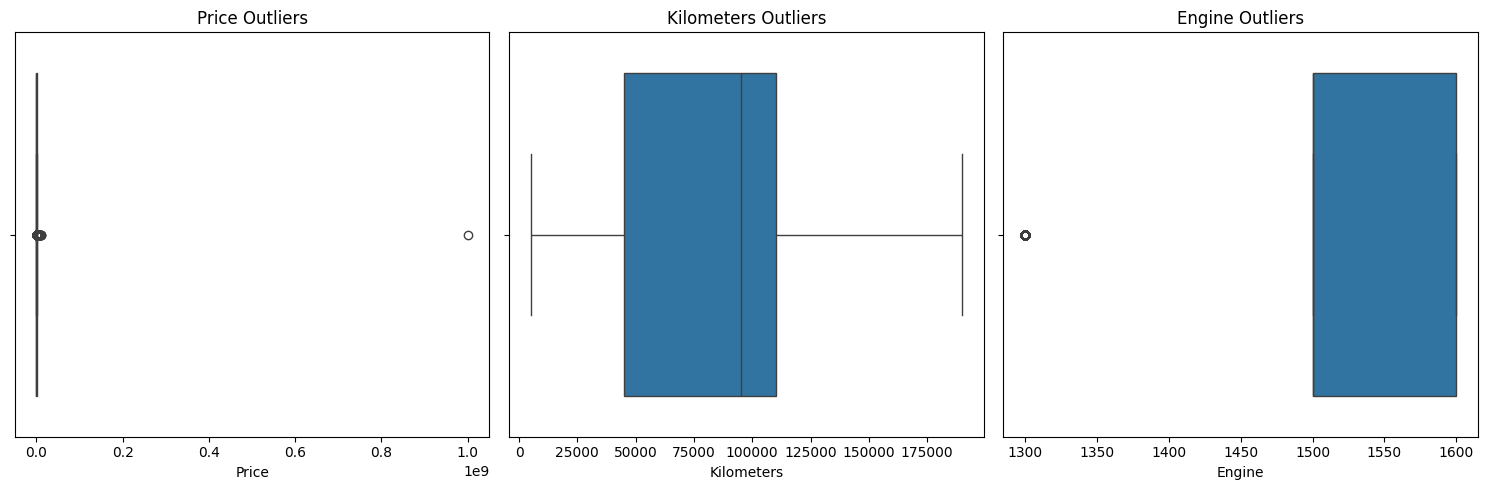

In [54]:
# Cell 15: Visualize outliers with boxplots
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x=df['Price'])
plt.title("Price Outliers")

plt.subplot(1,3,2)
sns.boxplot(x=df['Kilometers'])
plt.title("Kilometers Outliers")

plt.subplot(1,3,3)
sns.boxplot(x=df['Engine'])
plt.title("Engine Outliers")

plt.tight_layout()
plt.show()


## 📌 Cell 16 – Handle Outliers (Optional Filtering)

In [55]:
# Cell 16: Remove unrealistic outliers
df = df[(df['Price'] > 5) & (df['Price'] < 1000)]   # assuming price is in thousands
df = df[df['Kilometers'] < 1000000]
df = df[(df['Engine'] > 600) & (df['Engine'] < 6000)]

print("Dataset shape after outlier removal:", df.shape)


Dataset shape after outlier removal: (14713, 12)


We went from 19000 rows to nearly 15000

## 📌 Cell 17 – Dataset Overview After Cleaning


In [56]:
# Cell 17: Final dataset summary

print("✅ Final Dataset Shape:", df.shape)
print("\n📊 Numeric Columns Summary:\n")
print(df.describe().T)

print("\n🔎 Sample Distribution of Categorical Columns:\n")
for col in ['Brand', 'Model', 'Fuel', 'Trasmission', 'Body', 'Gov']:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head(10))  # top 10 categories


✅ Final Dataset Shape: (14713, 12)

📊 Numeric Columns Summary:

              count          mean           std     min      25%      50%  \
Year        14713.0   2005.475566     12.641751  1970.0   1998.0   2010.0   
Kilometers  14713.0  90986.222184  57121.681172  4999.0  34999.0  94999.0   
Engine      14713.0   1496.832733    119.948899  1300.0   1500.0   1500.0   
Price       14713.0    116.811629     82.296055     5.1     43.7    110.0   
new         14713.0      0.000068      0.008244     0.0      0.0      0.0   

                 75%       max  
Year          2015.0    2022.0  
Kilometers  129999.0  189999.0  
Engine        1600.0    1600.0  
Price          161.0     700.0  
new              0.0       1.0  

🔎 Sample Distribution of Categorical Columns:


Column: Brand
Brand
Hyundai      5681
Fiat         5016
Chevrolet    4016
Name: count, dtype: int64

Column: Model
Model
128        2411
Verna      1900
Elantra    1522
Lanos      1342
Accent     1271
Optra      1252
Shahin   

# 🔹 Step 2: Feature Engineering
## 📌 Cell 18 – Create Car Age Feature

The Year column alone isn’t ideal, because newer cars should be valued higher.
We’ll create a new feature Car_Age = Current Year – Year.

In [57]:
# Cell 18: Create Car_Age feature
from datetime import datetime

current_year = datetime.now().year
df['Car_Age'] = current_year - df['Year']

print(df[['Year', 'Car_Age']].head())


   Year  Car_Age
0  2007       18
1  2005       20
2  1999       26
3  2009       16
4  2000       25


## 📌 Cell 19 – Encode Categorical Features

Machine learning models can’t handle text directly.
We’ll use Label Encoding for high-cardinality columns (Brand, Model) and One-Hot Encoding for low-cardinality ones (Fuel, Trasmission, Body, Color, Gov).

In [58]:
# Cell 19: Encode categorical features
from sklearn.preprocessing import LabelEncoder

# Label encode Brand and Model
label_encoders = {}
for col in ['Brand', 'Model']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# One-hot encode categorical variables with few unique values
df = pd.get_dummies(df, columns=['Fuel', 'Trasmission', 'Body', 'Color', 'Gov'], drop_first=True)

print("Dataset shape after encoding:", df.shape)


Dataset shape after encoding: (14713, 53)


## 📌 Cell 20 – Drop Unnecessary Columns

We now have Car_Age, so we can drop Year (to avoid multicollinearity).
Also, the new column might not be informative if it’s redundant with Year/Car_Age.

In [59]:
# Cell 20: Drop unused columns
df = df.drop(columns=['Year', 'new'])

print("Columns after dropping:\n", df.columns)


Columns after dropping:
 Index(['Brand', 'Model', 'Kilometers', 'Engine', 'Price', 'Car_Age',
       'Fuel_Natural Gas', 'Fuel_gas', 'Trasmission_Manual',
       'Trasmission_automatic', 'Body_SUV', 'Body_Sedan', 'Body_Unknown',
       'Color_Black', 'Color_Blue- Navy Blue', 'Color_Brown', 'Color_Burgundy',
       'Color_Gold', 'Color_Gray', 'Color_Green', 'Color_Orange',
       'Color_Other Color', 'Color_Red', 'Color_Silver', 'Color_White',
       'Color_Yellow', 'Gov_Aswan', 'Gov_Asyut', 'Gov_Beheira',
       'Gov_Beni Suef', 'Gov_Cairo', 'Gov_Dakahlia', 'Gov_Damietta',
       'Gov_Fayoum', 'Gov_Gharbia', 'Gov_Giza', 'Gov_Ismailia',
       'Gov_Kafr al-Sheikh', 'Gov_Luxor', 'Gov_Matruh', 'Gov_Minya',
       'Gov_Monufia', 'Gov_New Valley', 'Gov_Port Said', 'Gov_Qalyubia',
       'Gov_Qena', 'Gov_Red Sea', 'Gov_Sharqia', 'Gov_Sohag',
       'Gov_South Sinai', 'Gov_Suez'],
      dtype='object')


## 📌 Cell 21 – Final Feature Matrix & Target

In [60]:
# Cell 21: Split features and target
X = df.drop(columns=['Price'])
y = df['Price']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (14713, 50)
Target shape: (14713,)


# 🔹 Step 3: Exploratory Data Analysis (EDA)

## 📌 Cell 22 – Price Distribution

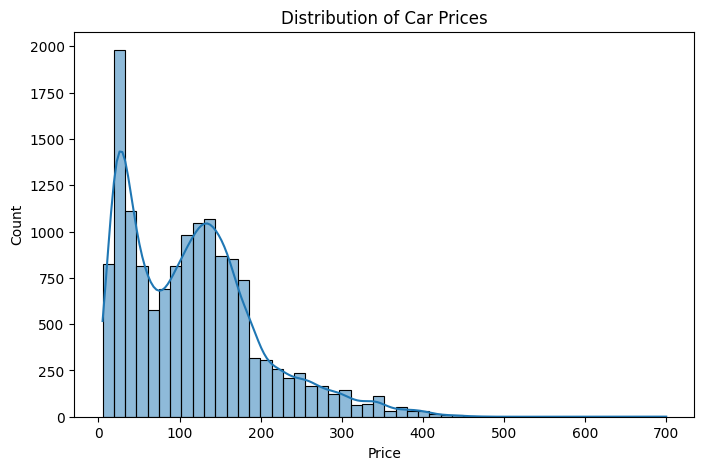

In [61]:
# Cell 22: Distribution of Price
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(y, bins=50, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


## 📌 Cell 23 – Price vs Car Age

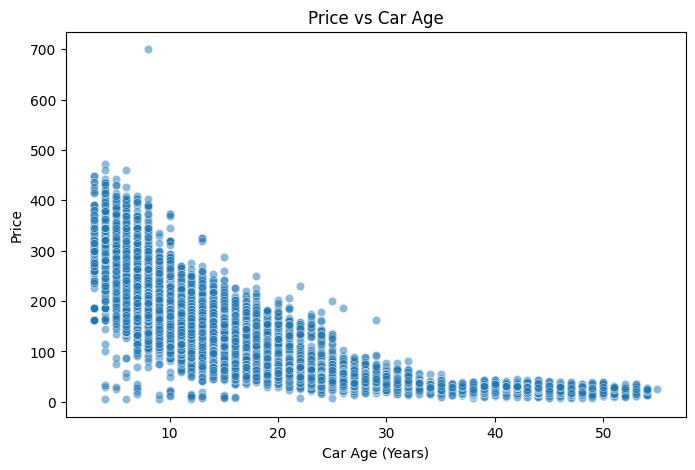

In [62]:
# Cell 23: Price vs Car Age
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Car_Age'], y=y, alpha=0.5)
plt.title("Price vs Car Age")
plt.xlabel("Car Age (Years)")
plt.ylabel("Price")
plt.show()


## 📌 Cell 24 – Price vs Engine Size

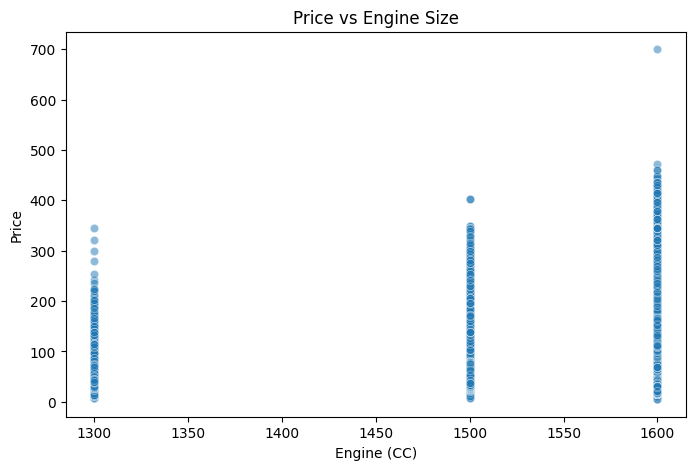

In [63]:
# Cell 24: Price vs Engine
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Engine'], y=y, alpha=0.5)
plt.title("Price vs Engine Size")
plt.xlabel("Engine (CC)")
plt.ylabel("Price")
plt.show()


## 📌 Cell 25 – Average Price by Brand

/tmp/ipython-input-2566906250.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_price.index, y=brand_price.values, palette="viridis")


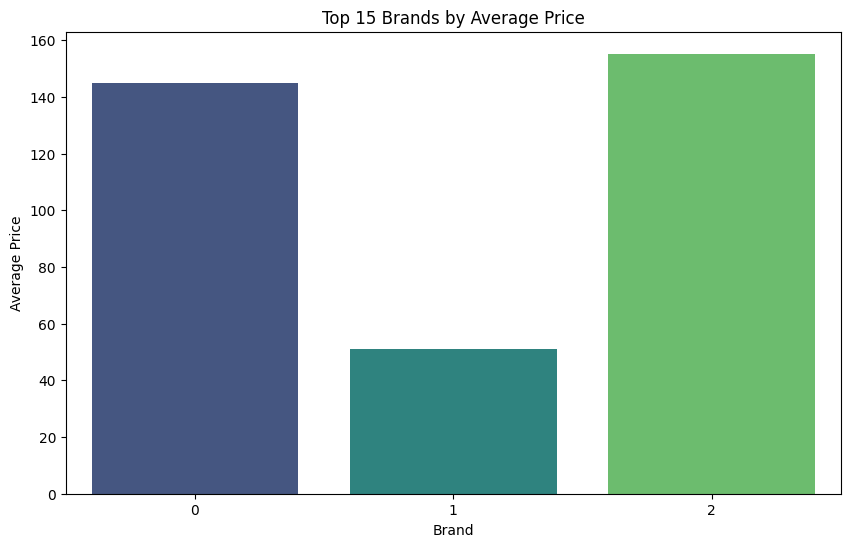

In [64]:
# Cell 25: Average Price by Brand
brand_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=brand_price.index, y=brand_price.values, palette="viridis")
plt.title("Top 15 Brands by Average Price")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.show()


## 📌 Cell 26 – Price by Transmission Type

In [65]:
# Cell 26: Price by Transmission
trans_cols = [col for col in df.columns if col.startswith("Trasmission_")]

for col in trans_cols:
    avg_price = df.groupby(col)['Price'].mean()
    print(f"\nAverage Price by {col}:\n", avg_price)



Average Price by Trasmission_Manual:
 Trasmission_Manual
False    198.230665
True      76.503374
Name: Price, dtype: float64

Average Price by Trasmission_automatic:
 Trasmission_automatic
False    116.771989
True     700.000000
Name: Price, dtype: float64


## 📌 Cell 27 – Correlation Heatmap

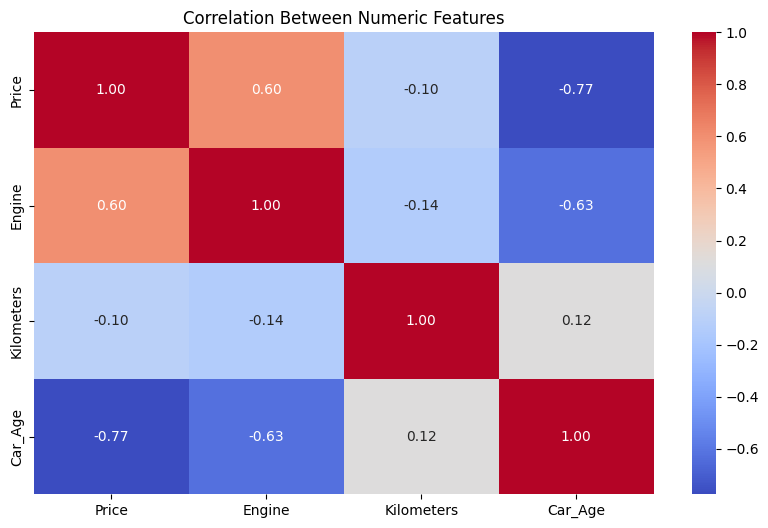

In [66]:
# Cell 27: Correlation heatmap
plt.figure(figsize=(10,6))
corr = df[['Price','Engine','Kilometers','Car_Age']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()


## 📌 Cell 28 – Price vs Kilometers (Outlier Check)

This scatterplot helps you see if any cars have unrealistic mileage vs price (e.g., very high kilometers but still very expensive).

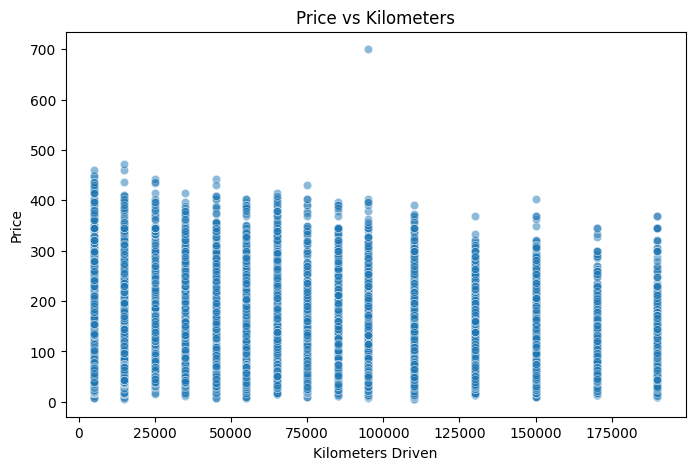

In [67]:
# Cell 28: Price vs Kilometers (Outlier Check)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Kilometers'], y=y, alpha=0.5)
plt.title("Price vs Kilometers")
plt.xlabel("Kilometers Driven")
plt.ylabel("Price")
plt.show()

## 📌 Cell 29 – Remove Extreme Outliers by Percentiles
We’ll cap at the 1st and 99th percentiles for key numeric columns:
*   Price
*   Kilometers
*   Engine

In [68]:
# Cell 29: Remove extreme outliers by percentile filtering

def remove_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower = df[column].quantile(lower_percentile)
    upper = df[column].quantile(upper_percentile)
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply filtering
df = remove_outliers(df, 'Price')
df = remove_outliers(df, 'Kilometers')
df = remove_outliers(df, 'Engine')

print("✅ Dataset shape after final outlier removal:", df.shape)


✅ Dataset shape after final outlier removal: (14421, 51)


## 📌 Cell 30 – Check New Distributions After Filtering

We’ll re-check distributions of Price, Kilometers, and Engine to confirm they look cleaner.

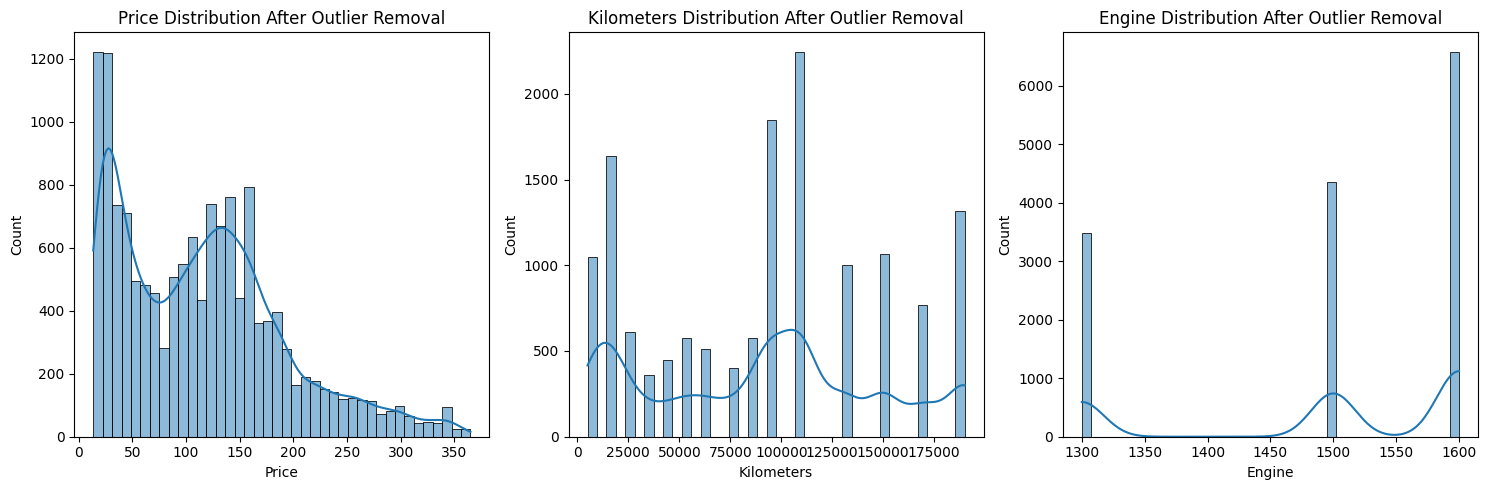

In [69]:
# Cell 30: Re-check distributions after outlier removal

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df['Price'], bins=40, kde=True)
plt.title("Price Distribution After Outlier Removal")

plt.subplot(1,3,2)
sns.histplot(df['Kilometers'], bins=40, kde=True)
plt.title("Kilometers Distribution After Outlier Removal")

plt.subplot(1,3,3)
sns.histplot(df['Engine'], bins=40, kde=True)
plt.title("Engine Distribution After Outlier Removal")

plt.tight_layout()
plt.show()

# 🔹 Step 4: Model Selection & Training
## 📌 Cell 31 – Train/Test Split
We’ll split data into training (80%) and testing (20%) to evaluate performance fairly.

In [71]:
# Cell 31: Train-test split
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (11536, 50)
Testing set shape: (2885, 50)


# 📌 Cell 32 – Baseline Model: Linear Regression

We’ll start with a simple Linear Regression to set a baseline.

In [72]:
# Cell 32: Baseline Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 2))


Linear Regression Performance:
MAE: 24.33
RMSE: 34.26
R²: 0.8


# 📌 Cell 33 – Tree Model: Random Forest Regressor

Tree-based models handle non-linear relationships and categorical interactions better.

In [73]:
# Cell 33: Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 2))


Random Forest Performance:
MAE: 13.56
RMSE: 21.32
R²: 0.92


## 📌 Cell 34 – Gradient Boosting: XGBoost

Boosted models often perform even better than Random Forests for tabular data.

In [74]:
# Cell 34: XGBoost Regressor
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print("XGBoost Performance:")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 2))


XGBoost Performance:
MAE: 12.43
RMSE: 20.35
R²: 0.93


## 📌 Cell 35 – Compare Model Performances

Let’s gather all results into a table for easy comparison.

In [75]:
# Cell 35: Compare model performances
results = {
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_xgb)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    ],
    "R²": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb)
    ]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


               Model        MAE       RMSE        R²
0  Linear Regression  24.331543  34.258480  0.802379
1      Random Forest  13.558553  21.315190  0.923498
2            XGBoost  12.434776  20.348143  0.930282


# 🔹 Step 5: Hyperparameter Tuning for XGBoost
## 📌 Cell 36 – Define Search Space and Run RandomizedSearchCV

In [78]:
# Cell 36: Hyperparameter tuning for XGBoost
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np

# Define parameter grid
param_grid = {
    'n_estimators': [200, 300, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

xgb_model = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=30,          # number of combinations to try
    scoring='neg_mean_squared_error',
    cv=3,               # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.6}


## 📌 Cell 37 – Train Final Model with Best Parameters

In [79]:
# Cell 37: Train final tuned XGBoost model
best_xgb = random_search.best_estimator_

y_pred_best = best_xgb.predict(X_test)

# Evaluate tuned model
mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print("Tuned XGBoost Performance:")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 2))


Tuned XGBoost Performance:
MAE: 12.27
RMSE: 20.18
R²: 0.93


# 🔹 Step 5.3: Training Curves for Tuned XGBoost
## 📌 Cell 38 – Train with Evaluation Tracking

In [83]:
# Cell 38: Train tuned XGBoost with evaluation tracking (fixed)
eval_set = [(X_train, y_train), (X_test, y_test)]

# Take the best estimator from random search and add eval_metric
best_xgb = XGBRegressor(
    **random_search.best_params_,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1,
    eval_metric="rmse"
)

best_xgb.fit(
    X_train, y_train,
    eval_set=eval_set,
    verbose=False
)

results = best_xgb.evals_result()

## 📌 Cell 39 – Plot Training vs Validation RMSE

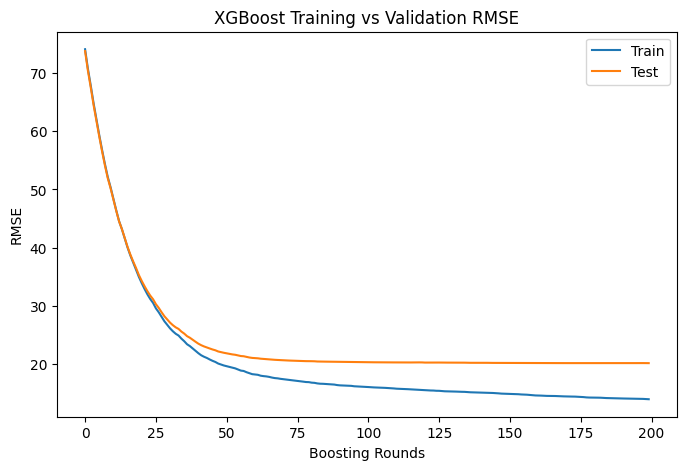

In [84]:
# Cell 39: Plot training and validation RMSE
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

plt.figure(figsize=(8,5))
plt.plot(x_axis, results['validation_0']['rmse'], label='Train')
plt.plot(x_axis, results['validation_1']['rmse'], label='Test')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('XGBoost Training vs Validation RMSE')
plt.legend()
plt.show()


This plot will help you check for overfitting:

If training error drops but validation error rises → overfit.

If both decrease steadily and flatten close together → well-tuned model ✅.

# 🔹 Step 6: Model Explainability
## 📌 Cell 40 – Feature Importance (Gain-Based)

This shows which features contribute the most to reducing error in XGBoost.

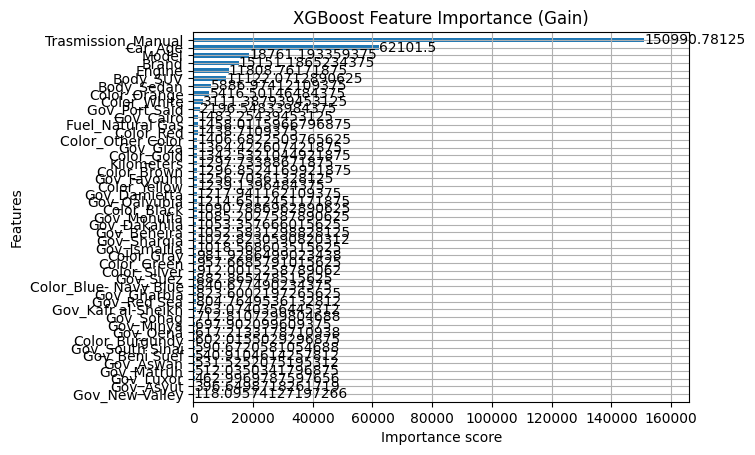

In [85]:
# Cell 40: Feature importance (gain-based)
import xgboost as xgb

xgb.plot_importance(best_xgb, importance_type='gain', height=0.6)
plt.title("XGBoost Feature Importance (Gain)")
plt.show()


## 📌 Cell 41 – SHAP Values (Detailed Explainability)
SHAP (SHapley Additive exPlanations) shows how each feature impacts predictions, not just importance.

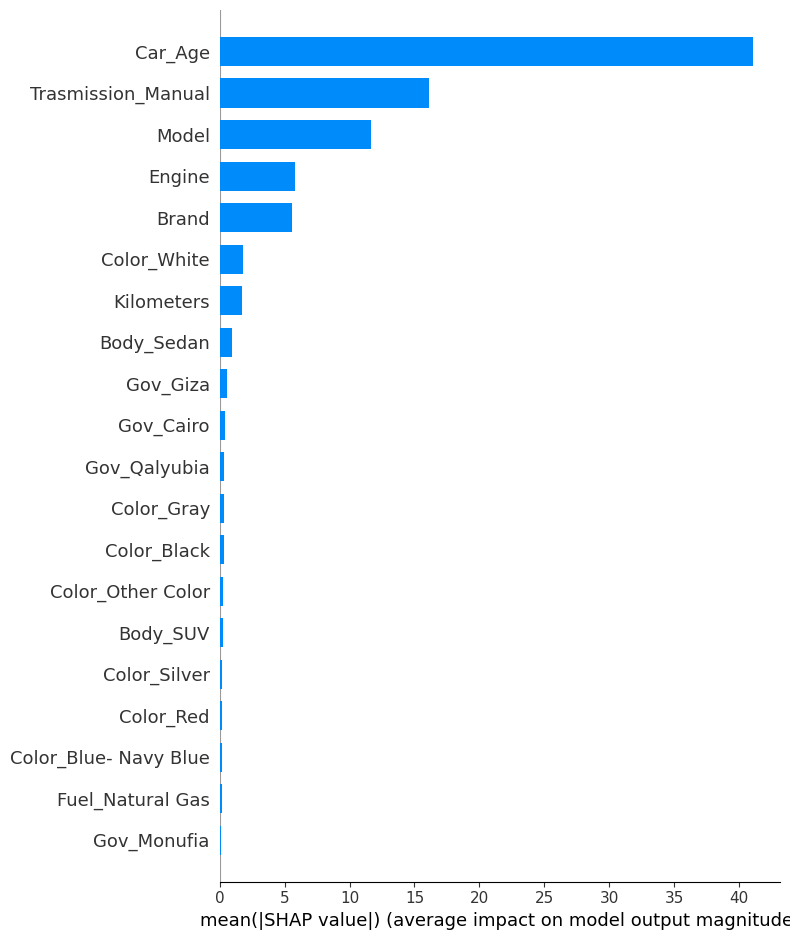

In [86]:
# Cell 41: SHAP explainability
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer(X_test)

# Summary plot (feature impact on predictions)
shap.summary_plot(shap_values, X_test, plot_type="bar")


## 📌 Cell 42 – SHAP Detailed Summary Plot

This shows the direction of impact: e.g., high mileage decreases price, newer year increases price.

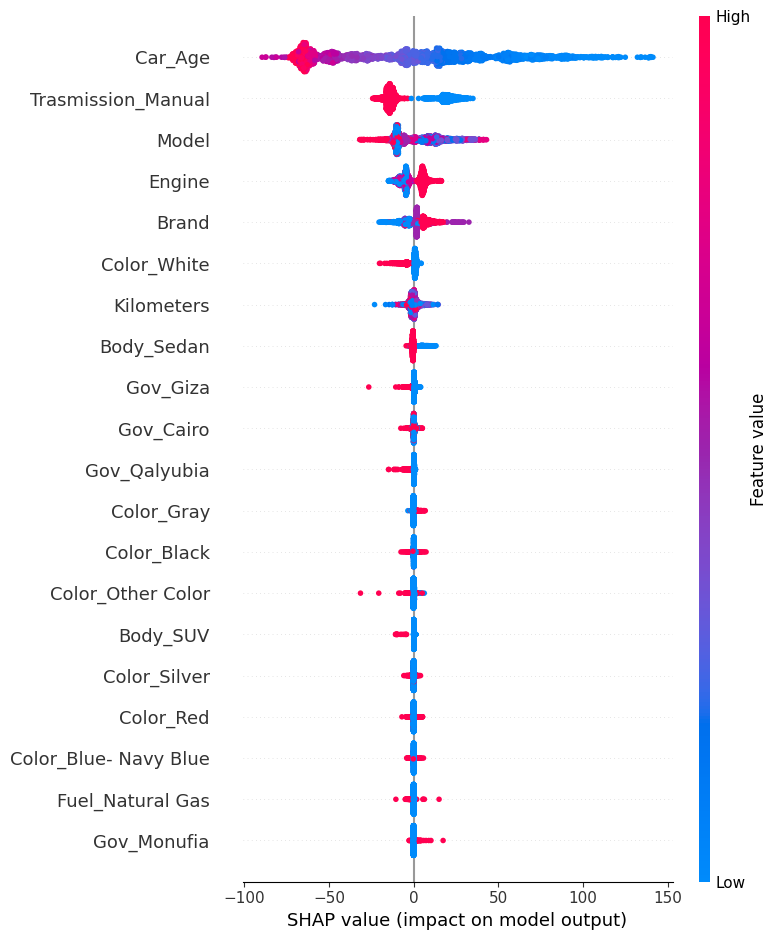

In [87]:
# Cell 42: SHAP summary plot (detailed)
shap.summary_plot(shap_values, X_test)


# 🔹 Step 7: Save and Deploy the Model
## 📌 Cell 43 – Save the Trained Model

We’ll save the tuned XGBoost model so you don’t need to retrain every time.

In [88]:
# Cell 43: Save tuned model
import joblib

joblib.dump(best_xgb, "xgboost_car_price_model.pkl")
print("✅ Model saved as xgboost_car_price_model.pkl")


✅ Model saved as xgboost_car_price_model.pkl


## 📌 Cell 44 – Load the Model Later

This lets you reload the trained model and use it directly for predictions.

In [89]:
# Cell 44: Load model
loaded_model = joblib.load("xgboost_car_price_model.pkl")

# Test prediction
sample = X_test.iloc[0:1]  # first row of test set
predicted_price = loaded_model.predict(sample)
print("Predicted Price:", predicted_price[0])
print("Actual Price:", y_test.iloc[0])


Predicted Price: 117.97074
Actual Price: 126.5


## 📌 Cell 45 – Simple Prediction Function

Let’s wrap prediction into a clean function you can use later.

In [90]:
# Cell 45: Function for predictions
def predict_price(model, input_data):
    """
    Predict car price from input data.
    input_data should be a pandas DataFrame with the same columns as training data (X).
    """
    return model.predict(input_data)[0]

# Example usage
example_car = X_test.iloc[5:6]
print("Predicted:", predict_price(loaded_model, example_car))
print("Actual:", y_test.iloc[5])


Predicted: 43.876884
Actual: 38.0


# **Final Stage - Deployment**
 Run this single cell after you’ve finished training and picked the tuned
best_xgb . It will save: - the
 tuned model (
 xgboost_car_price_model.pkl ) - label encoder classes for Brand & Model - the full
 list of feature columns the model expects (so we build inputs in the same order) - allowed option lists
 (Fuel/Transmission/Body/Color/Gov) reconstructed from your one‑hot columns

In [97]:
# === Cell: Save artifacts for Flask app ===
import re
import joblib
import pandas as pd

# 1) Save the tuned model (if not already saved)
joblib.dump(best_xgb, "xgboost_car_price_model.pkl")

# 2) Persist LabelEncoder classes for Brand & Model
brand_classes = label_encoders['Brand'].classes_.tolist()
model_classes = label_encoders['Model'].classes_.tolist()

# 3) Persist the feature column order used to train the model
feature_columns = X.columns.tolist()  # after all encoding/feature engineering

# 4) Reconstruct option lists for one-hot groups from feature columns
#    We look for columns like Prefix_Value (e.g., Fuel_Diesel) and collect the values.

def collect_options(prefix):
    opts = []
    pattern = re.compile(rf'^{re.escape(prefix)}_(.*)$')
    for col in feature_columns:
        m = pattern.match(col)
        if m:
            opts.append(m.group(1))
    return sorted(opts)

fuel_options        = collect_options('Fuel')
transmission_options= collect_options('Trasmission')
body_options        = collect_options('Body')
color_options       = collect_options('Color')
gov_options         = collect_options('Gov')

artifacts = {
    'brand_classes': brand_classes,
    'model_classes': model_classes,
    'feature_columns': feature_columns,
    'fuel_options': fuel_options,
    'transmission_options': transmission_options,
    'body_options': body_options,
    'color_options': color_options,
    'gov_options': gov_options
}

joblib.dump(artifacts, 'artifacts.joblib')
print('✅ Saved: xgboost_car_price_model.pkl and artifacts.joblib')


✅ Saved: xgboost_car_price_model.pkl and artifacts.joblib


In [98]:
from google.colab import files
files.download("xgboost_car_price_model.pkl")
files.download("artifacts.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

👉 Once you have these two files, put them in the same folder as your Flask app (app.py + templates/index.html).
Then run:

python app.py


Make sure xgboost_car_price_model.pkl and artifacts.joblib sit next to your Flask app.py when you deploy.